## Imports

In [ ]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

In [ ]:
!pip install pyccel

     |████████████████████████████████| 286kB 8.0MB/s 
     |████████████████████████████████| 81kB 6.9MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 


## Pure python function

In [ ]:
def solve_2d_burger_pure(u, un, v, vn, nt, dt, dx, dy, nu):
    
    
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape

    for n in range(nt + 1):
      for j in range(row):
        for i in range(col):
          un[j][i] = u[j][i]
          vn[j][i] = v[j][i] 
      
      for j in range(2, row):
        for i in range(2, col): 
          u[j-1, i-1] = (un[i-1, j-1] - dt / dx * un[j-1, i-1] * 
                         (un[j-1, i-1] - un[j-1, i-2]) - dt / dy *
                         vn[j-1, i-1] * (un[j-1, i-1] - un[j-2, i-1]) +
                         nu * dt / dx**2 * (un[j-1, i] - 2 * un[j-1, i-1] +
                         un[j-1, i-2]) + nu * dt / dy**2 * (un[j, i-1] - 2 *
                        un[j-1, i-1] + un[j-2, i-1])) 

          v[j-1, i-1] = (vn[j-1, 1-1] -dt / dx * un[j-1, i-1] * (vn[j-1, i-1]-
                         vn[j-1, i-2]) -dt / dy * vn[j-1, i-1] * (vn[j-1, i-1]-
                         vn[j-2, i-1]) + nu * dt / dx**2 * (vn[j-1, i] - 2 *
                         vn[j-1, i-1] + vn[j-1, i-2]) + nu * dt / dy**2 *
                         (vn[j, i-1] - 2 * vn[j-1, i-1] + vn[j-2, i-1])) 
          
          u[0, :], v[0, :] = 1,1
          u[-1, :], v[-1, :] = 1,1
          u[:, 0], v[:, 0] = 1,1
          u[:, -1], v[:, -1] = 1,1
          
        
    return 0

## Numba accelerator

In [ ]:

@njit(fastmath=True)
def solve_2d_burger_numba(u, un, v, vn, nt, dt, dx, dy, nu):
    
    
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    for n in range(nt + 1):
      for j in range(row):
        for i in range(col):
          un[j][i] = u[j][i]
          vn[j][i] = v[j][i] 
      
      for j in range(2, row):
        for i in range(2, col): 
          u[j-1, i-1] = (un[i-1, j-1] - dt / dx * un[j-1, i-1] * 
                         (un[j-1, i-1] - un[j-1, i-2]) - dt / dy *
                         vn[j-1, i-1] * (un[j-1, i-1] - un[j-2, i-1]) +
                         nu * dt / dx**2 * (un[j-1, i] - 2 * un[j-1, i-1] +
                         un[j-1, i-2]) + nu * dt / dy**2 * (un[j, i-1] - 2 *
                        un[j-1, i-1] + un[j-2, i-1])) 

          v[j-1, i-1] = (vn[j-1, 1-1] -dt / dx * un[j-1, i-1] * (vn[j-1, i-1]-
                         vn[j-1, i-2]) -dt / dy * vn[j-1, i-1] * (vn[j-1, i-1]-
                         vn[j-2, i-1]) + nu * dt / dx**2 * (vn[j-1, i] - 2 *
                         vn[j-1, i-1] + vn[j-1, i-2]) + nu * dt / dy**2 *
                         (vn[j, i-1] - 2 * vn[j-1, i-1] + vn[j-2, i-1])) 
          
          u[0, :], v[0, :] = 1,1
          u[-1, :], v[-1, :] = 1,1
          u[:, 0], v[:, 0] = 1,1
          u[:, -1], v[:, -1] = 1,1
          
        
    return 0

## Pyccel accelerator

In [ ]:
def solve_2d_burger_pyccel(u:'float[:,:]', un:'float[:,:]', v:'float[:,:]', vn:'float[:,:]', nt:'int', dt:'float', dx:'float', dy:'float', nu:'float'):
    
    
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    for n in range(nt + 1):
      for j in range(row):
        for i in range(col):
          un[j][i] = u[j][i]
          vn[j][i] = v[j][i] 
      
      for j in range(2, row):
        for i in range(2, col): 
          u[j-1, i-1] = (un[i-1, j-1] - dt / dx * un[j-1, i-1] * (un[j-1, i-1] - un[j-1, i-2]) - dt / dy * vn[j-1, i-1] * (un[j-1, i-1] - un[j-2, i-1]) + nu * dt / dx**2 * (un[j-1, i] - 2 * un[j-1, i-1] + un[j-1, i-2]) + nu * dt / dy**2 * (un[j, i-1] - 2 * un[j-1, i-1] + un[j-2, i-1])) 

          v[j-1, i-1] = (vn[j-1, 1-1] -dt / dx * un[j-1, i-1] * (vn[j-1, i-1]- vn[j-1, i-2]) -dt / dy * vn[j-1, i-1] * (vn[j-1, i-1]- vn[j-2, i-1]) + nu * dt / dx**2 * (vn[j-1, i] - 2 * vn[j-1, i-1] + vn[j-1, i-2]) + nu * dt / dy**2 * (vn[j, i-1] - 2 * vn[j-1, i-1] + vn[j-2, i-1])) 
          
          u[0, :] = 1
          v[0, :] = 1

          u[-1, :]= 1
          v[-1, :] = 1

          u[:, 0] = 1
          v[:, 0] = 1

          u[:, -1] = 1
          v[:, -1] = 1
          
        
    return 0

## Inputs

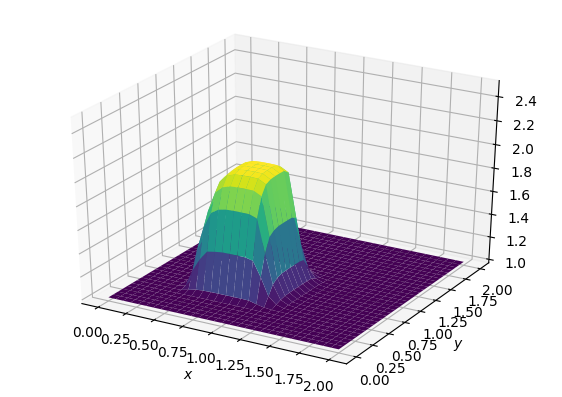

In [ ]:
###variable declarations
nx = 31
ny = 31
nt = 120
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu


x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))  # create a 1xn vector of 1's
v = np.ones((ny, nx))
un = np.ones((ny, nx)) 
vn = np.ones((ny, nx))

solve_2d_burger_pure(u, un, v, vn, nt, dt, dx, dy, nu)

X, Y = np.meshgrid(x, y)
fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_zlim(1, 2.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

## Call Funtions

### Pure function

In [ ]:
%timeit solve_2d_burger_pure(u, un, v, vn, nt, dt, dx, dy, nu)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


1 loop, best of 5: 1.91 s per loop


### Function with numba accelerator

In [ ]:
%timeit solve_2d_burger_numba(u, un, v, vn, nt, dt, dx, dy, nu)

The slowest run took 130.86 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 12.2 ms per loop


### Function with pyccel accelerator

In [ ]:
solve_2d_burger_f90 = epyccel(solve_2d_burger_pyccel)

In [ ]:
%timeit solve_2d_burger_f90(u, un, v, vn, nt, dt, dx, dy, nu)

100 loops, best of 5: 11.2 ms per loop
